Ground Truth Rect i0: 1.2230114285248028
Predicted Rect i0: 3.829752495520566
IoU Score for Rect i0: 0
Ground Truth Rect i1: 1.7293876699636834
Predicted Rect i1: 3.155190599538849
IoU Score for Rect i1: 0
Ground Truth Rect i10: 3.5537532406802774
Predicted Rect i10: 2.3279167004332075
IoU Score for Rect i10: 0
Ground Truth Rect i11: 2.043120537571028
Predicted Rect i11: 3.301488574352481
IoU Score for Rect i11: 0
Ground Truth Rect i12: 2.787361909873891
Predicted Rect i12: 3.59769377747316
IoU Score for Rect i12: 0
Ground Truth Rect i13: 3.1884268037690378
Predicted Rect i13: 1.9971312677435966
IoU Score for Rect i13: 0
Ground Truth Rect i14: 2.5726656900426907
Predicted Rect i14: 2.660773916364953
IoU Score for Rect i14: 0
Ground Truth Rect i15: 1.1773963346763594
Predicted Rect i15: 1.4612213204044289
IoU Score for Rect i15: 0
Ground Truth Rect i16: 1.0273836845189637
Predicted Rect i16: 1.672125842852568
IoU Score for Rect i16: 0
Ground Truth Rect i17: 0.3836580002507306
Predicted 

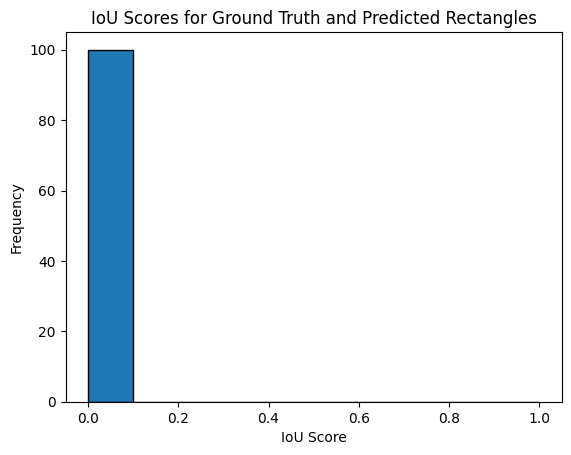

In [24]:
import h5py
import numpy as np
import matplotlib.pyplot as plt

def calculate_iou(rect1, rect2):
    if isinstance(rect1, (float, np.float64)):
        x1, y1, w1, h1 = rect1, 0, 0, 0
    else:
        x1, y1, w1, h1 = rect1

    if isinstance(rect2, (float, np.float64)):
        x2, y2, w2, h2 = rect2, 0, 0, 0
    else:
        x2, y2, w2, h2 = rect2

    intersection_x = max(0, min(x1 + w1, x2 + w2) - max(x1, x2))
    intersection_y = max(0, min(y1 + h1, y2 + h2) - max(y1, y2))

    intersection_area = intersection_x * intersection_y
    union_area = w1 * h1 + w2 * h2 - intersection_area

    if union_area == 0:
        iou = 0  # or handle it in a way that makes sense for your application
    else:
        iou = intersection_area / union_area

    return iou

filename = 'rectanglesdsss.sec'
with h5py.File(filename, 'r') as file:
    ground_truth_group = file['/ground_truth']
    predicted_group = file['/predicted']

    iou_scores = []

    for key in ground_truth_group.keys():
        gt_rect = ground_truth_group[key].attrs['i0']
        pred_rect = predicted_group[key].attrs['i0']

        print(f"Ground Truth Rect {key}: {gt_rect}")
        print(f"Predicted Rect {key}: {pred_rect}")

        iou = calculate_iou(gt_rect, pred_rect)
        print(f"IoU Score for Rect {key}: {iou}")

        iou_scores.append(iou)

# Plot the histogram
plt.hist(iou_scores, bins=np.linspace(0, 1, 11), edgecolor='black')
plt.xlabel('IoU Score')
plt.ylabel('Frequency')
plt.title('IoU Scores for Ground Truth and Predicted Rectangles')
plt.show()


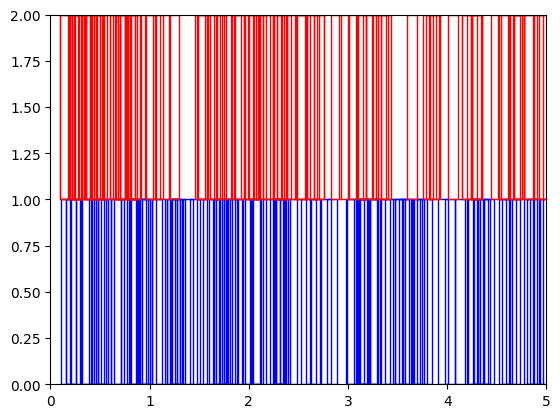

In [25]:
import h5py
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches

filename = 'rectanglesdsss.sec'
with h5py.File(filename, 'r') as file:
    ground_truth_group = file['/ground_truth']
    predicted_group = file['/predicted']

    ground_truth_rectangles = []
    predicted_rectangles = []

    for key in ground_truth_group.keys():
        # Access the attributes of each subgroup directly
        gt_subgroup = ground_truth_group[key]
        pred_subgroup = predicted_group[key]

        if 'i0' in gt_subgroup.attrs and 'i0' in pred_subgroup.attrs:
            gt_attr = gt_subgroup.attrs['i0']
            pred_attr = pred_subgroup.attrs['i0']

            # Check if the attributes are single float values
            if isinstance(gt_attr, (float, np.float64)):
                gt_rect = (gt_attr,)
            else:
                gt_rect = tuple(gt_attr)

            if isinstance(pred_attr, (float, np.float64)):
                pred_rect = (pred_attr,)
            else:
                pred_rect = tuple(pred_attr)

            ground_truth_rectangles.append(gt_rect)
            predicted_rectangles.append(pred_rect)


def calculate_iou(rect1, rect2):
    if len(rect1) == 1:
        x1, y1, w1, h1 = rect1[0], 0, 0, 0
    else:
        x1, y1, w1, h1 = rect1

    if len(rect2) == 1:
        x2, y2, w2, h2 = rect2[0], 0, 0, 0
    else:
        x2, y2, w2, h2 = rect2

    intersection_x = max(0, min(x1 + w1, x2 + w2) - max(x1, x2))
    intersection_y = max(0, min(y1 + h1, y2 + h2) - max(y1, y2))

    intersection_area = intersection_x * intersection_y
    union_area = w1 * h1 + w2 * h2 - intersection_area

    if union_area == 0:
        iou = 0  # or handle it in a way that makes sense for your application
    else:
        iou = intersection_area / union_area

    return iou


def visualize_rectangles(gt_rectangles, pred_rectangles):
    fig, ax = plt.subplots()

    # Plot ground truth rectangles in blue
    for rect in gt_rectangles:
        rect_patch = patches.Rectangle((rect[0], 0), 0.1, 1, linewidth=1, edgecolor='blue', facecolor='none')
        ax.add_patch(rect_patch)

    # Plot predicted rectangles in red
    for rect in pred_rectangles:
        rect_patch = patches.Rectangle((rect[0], 1), 0.1, 1, linewidth=1, edgecolor='red', facecolor='none')
        ax.add_patch(rect_patch)

    ax.set_xlim(0, 5)  # Set x-axis limits based on your data
    ax.set_ylim(0, 2)  # Set y-axis limits based on the number of rectangles

    plt.show()


# Call the function to visualize rectangles
visualize_rectangles(ground_truth_rectangles, predicted_rectangles)
